In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Data

Since dataset is missing columns arbitrary columns are added

In [ ]:
columns = ['id','f1','f2','f3','f4','f5','f6','f7','f8','f9','label']

In [ ]:
cancer_data = pd.read_csv('/content/drive/MyDrive/AML/breast-cancer-wisconsin.data', names = columns)

In [ ]:
cancer_data

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,label
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      699 non-null    int64 
 1   f1      699 non-null    int64 
 2   f2      699 non-null    int64 
 3   f3      699 non-null    int64 
 4   f4      699 non-null    int64 
 5   f5      699 non-null    int64 
 6   f6      699 non-null    object
 7   f7      699 non-null    int64 
 8   f8      699 non-null    int64 
 9   f9      699 non-null    int64 
 10  label   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Feature 6 has some null values so we drop the samples with null values as '?' and string values so we drop the null values and convert strings into integers

In [ ]:
cancer_data.drop(cancer_data.index[cancer_data['f6'] == '?'], inplace=True)
cancer_data['f6'] = cancer_data["f6"].astype(int)

In [ ]:
cancer_data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,label
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Checking for null values

In [ ]:
cancer_data.isnull().sum()

id       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
label    0
dtype: int64

# Removing labels from the dataset

In [ ]:
labels = cancer_data['label']

# Plotting Co-relation Matrix to identify irrelevant features

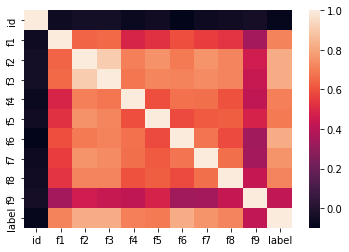

In [ ]:
import seaborn as sns

sns.heatmap(cancer_data.corr())

# Dropping id as it is irrelevant to our problem

In [ ]:
cancer_data = cancer_data.drop('label', axis = 1)
cancer_data = cancer_data.drop('id', axis = 1)

In [ ]:
cancer_data, labels

(     f1  f2  f3  f4  f5  f6  f7  f8  f9
 0     5   1   1   1   2   1   3   1   1
 1     5   4   4   5   7  10   3   2   1
 2     3   1   1   1   2   2   3   1   1
 3     6   8   8   1   3   4   3   7   1
 4     4   1   1   3   2   1   3   1   1
 ..   ..  ..  ..  ..  ..  ..  ..  ..  ..
 694   3   1   1   1   3   2   1   1   1
 695   2   1   1   1   2   1   1   1   1
 696   5  10  10   3   7   3   8  10   2
 697   4   8   6   4   3   4  10   6   1
 698   4   8   8   5   4   5  10   4   1
 
 [683 rows x 9 columns], 0      2
 1      2
 2      2
 3      2
 4      2
       ..
 694    2
 695    2
 696    4
 697    4
 698    4
 Name: label, Length: 683, dtype: int64)

# Writing Function for K *means*

In [ ]:
import random as rand
class KMeans():

    def __init__(self, k, iter):
        self.k = k
        self.iter = iter

    def initialize(self, data):    
        centroids = []

        for _ in range(self.k):
            centroid = data[rand.randint(0, len(data))]
            centroids.append(centroid)

        return centroids 

    def clustering(self, data, centroids):
        assigned_clusters = []

        for sample in data:
            cluster = []

            for centroid in centroids:

                closest_clust = np.linalg.norm(np.array(sample) - np.array(centroid))
                cluster.append(closest_clust)

            assigned_cluster = np.argmin(cluster)
            assigned_clusters.append(assigned_cluster)

        return assigned_clusters

    def update_centroids(self, data, centroids, assigned_clusters):
        centroids = []

        for i in range(self.k):
            cluster = []

            for j in range(len(data)):

                if (assigned_clusters[j] == i):
                    cluster.append(data[j])

            mean = list(np.mean(cluster, axis=0))
            centroids.append(mean)

        return centroids

    def assign_cluster(self, data, assigned_clusters):

        clusters = []
        for i in range(self.k):
            cluster = []

            for j in range(len(data)):

                if (assigned_clusters[j] == i):
                    cluster.append(data[j])

            clusters.append(cluster)

        return clusters

    def prediction(self, data, final_clusters):

        pred = []

        for sample in data:

            if sample in final_clusters[0]:
                pred.append(2)

            else:
                pred.append(4)

        return pred

    def score(self, pred, labels):

        correct = (labels == pred)
        score = correct.sum() / correct.size
        accuracy  = 'Accuracy is : ' + str((score)*100) + ' %'

        return accuracy

    def fit(self, data):

        data = data.values.tolist()
        centroids = self.initialize(data)
        print('Staring with Centroids :', centroids, '\n')


        for i in range(self.iter):

            print('------Iteration ', i+1 ,'---------')
            assigned_clusters = self.clustering(data, centroids)

            centroids = self.update_centroids(data, centroids, assigned_clusters)
            print('Centroids are :', centroids, "\n")

        final_clusters = self.assign_cluster(data, assigned_clusters)
        pred = self.prediction(data, final_clusters)

        return pred



# Testing Kmeans algorithm on 10 iterations
Note :- we take k = 2 as the dataset labels only have 2 classes

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer_data, labels, test_size=0.2, random_state=0)

In [ ]:
model = KMeans(k=2, iter=10)

In [ ]:
pred = model.fit(x_train)

Staring with Centroids : [[5, 1, 1, 1, 2, 1, 2, 1, 1], [10, 5, 7, 4, 4, 10, 8, 9, 1]] 

------Iteration  1 ---------
Centroids are : [[3.1105121293800537, 1.366576819407008, 1.4851752021563343, 1.398921832884097, 2.142857142857143, 1.3692722371967656, 2.161725067385445, 1.280323450134771, 1.0943396226415094], [7.228571428571429, 6.914285714285715, 6.845714285714286, 5.731428571428571, 5.508571428571429, 7.8914285714285715, 6.234285714285714, 6.422857142857143, 2.662857142857143]] 

------Iteration  2 ---------
Centroids are : [[3.0657534246575344, 1.3095890410958904, 1.4465753424657535, 1.3287671232876712, 2.073972602739726, 1.3287671232876712, 2.128767123287671, 1.2493150684931507, 1.093150684931507], [7.18232044198895, 6.845303867403315, 6.745856353591161, 5.7292817679558015, 5.535911602209945, 7.7569060773480665, 6.165745856353591, 6.314917127071824, 2.613259668508287]] 

------Iteration  3 ---------
Centroids are : [[3.041322314049587, 1.2947658402203857, 1.4352617079889807, 1.3305

# Finding accuracy of the Model using predicted values and labels

In [ ]:
model.score(pred, y_train)

'Accuracy is : 96.7032967032967 %'

# Testing the Model on different centers by using differnt seeds for random selection of centers

In [ ]:
rand.seed = 1
model1 = KMeans(k=2,iter=10)

rand.seed = 2
model2 = KMeans(k=2,iter=10)

rand.seed = 3
model3 = KMeans(k=2,iter=10)

In [ ]:
pred1 = model1.fit(x_train)
pred2 = model2.fit(x_train)
pred3 = model3.fit(x_train)

Staring with Centroids : [[1, 1, 1, 1, 2, 1, 3, 1, 1], [5, 7, 9, 8, 6, 10, 8, 10, 1]] 

------Iteration  1 ---------
Centroids are : [[3.1485411140583555, 1.3925729442970822, 1.5198938992042441, 1.3925729442970822, 2.1538461538461537, 1.493368700265252, 2.220159151193634, 1.312997347480106, 1.0981432360742707], [7.289940828402367, 7.053254437869822, 6.958579881656805, 5.899408284023669, 5.603550295857988, 7.846153846153846, 6.2485207100591715, 6.5325443786982245, 2.710059171597633]] 

------Iteration  2 ---------
Centroids are : [[3.0846994535519126, 1.3169398907103824, 1.4508196721311475, 1.3278688524590163, 2.0765027322404372, 1.3333333333333333, 2.139344262295082, 1.2595628415300546, 1.0956284153005464], [7.166666666666667, 6.861111111111111, 6.766666666666667, 5.7555555555555555, 5.55, 7.783333333333333, 6.166666666666667, 6.322222222222222, 2.6166666666666667]] 

------Iteration  3 ---------
Centroids are : [[3.041322314049587, 1.2947658402203857, 1.4352617079889807, 1.33057851239

In [ ]:
model1.score(pred1, y_train)

'Accuracy is : 96.7032967032967 %'

In [ ]:
model2.score(pred2, y_train)

'Accuracy is : 97.06959706959707 %'

In [ ]:
model3.score(pred3, y_train)

'Accuracy is : 97.06959706959707 %'

# Conclusion: 
Changing the starting centers does not affect the algorithm in any way since the accuracy is same for all 3 models. The model will converge to its ideal state regardless of the starting centroid

#Now we Check if using Supervised techniques gives different results or not

# Loading Logistic Regression and Knearest Neighbour Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = [LogisticRegression(random_state=0), KNeighborsClassifier()]

In [ ]:
for model in models:
    model.fit(x_train,y_train)
    print('Accuracy of model', model, 'is :', model.score(x_test, y_test))

Accuracy of model LogisticRegression(random_state=0) is : 0.9562043795620438
Accuracy of model KNeighborsClassifier() is : 0.9708029197080292


# Conclusion:
Supervised Models perform similiarly to unsupervised techniques for this problem


## Prob 2: Fisher Projection of Mnist Data to D' = 2 and D' = 3

### Importing base libraries 

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import tensorflow as tf

D:\CodingSW\Conda\envs\tfl\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\CodingSW\Conda\envs\tfl\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\CodingSW\Conda\envs\tfl\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\CodingSW\Conda\envs\tfl\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

### Loading the MNIST Dataset onto a callable object

In [2]:
mnist = tf.keras.datasets.mnist

### Declaring the provided gaussian functions

### Splitting the dataset into train and test data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('X_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


The MNIST dataset is an image dataset and each image is 28*28, but you can regard each pixel as one dimension, so the input data point has 28*28=784 dimensions.

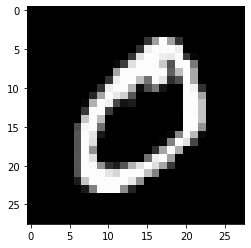

In [4]:
image = x_train[1]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

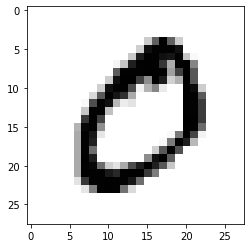

In [5]:
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()

## Plotting all Individual images for digits

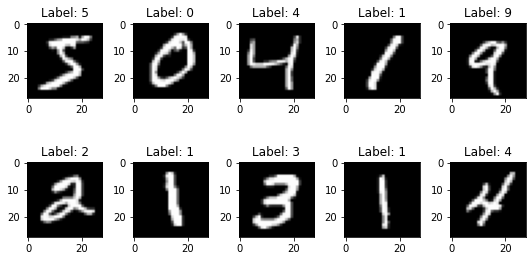

In [6]:
images = x_train[:10]
num_labels = y_train[:10]

num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(num_labels[i]))
plt.tight_layout()
plt.show()

# Normalizing Dataset

In [7]:
#Normalizing the training and test pixel values for max threshold of 255 per pixel
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

## Data - label visualization

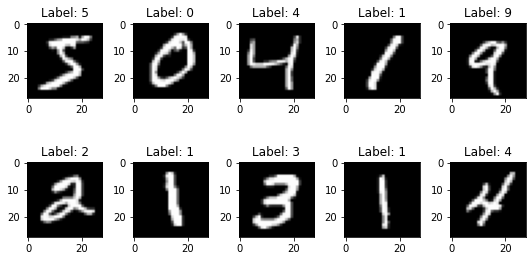

In [8]:
images = x_train_norm[:10]
num_labels = y_train[:10]

num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(num_labels[i]))
plt.tight_layout()
plt.show()

## Preparing the Dataset for Training

In [9]:
data_train = [x.flatten().tolist() for x in x_train_norm]
labels_train = [x for x in y_train]
data_test = [x.flatten().tolist() for x in x_test_norm]
labels_test = [x for x in y_test]

type(data_train)
type(labels_train)
type(data_test)
type(labels_test)
print("Size of dataset:",len(data_train))
print("Size of dataset:",len(labels_train))
print("Size of dataset:",len(data_test))
print("Size of dataset:",len(labels_test))

Size of dataset: 60000
Size of dataset: 60000
Size of dataset: 10000
Size of dataset: 10000


## Functions for gaussian distributions

In [10]:
from numpy.linalg import inv,pinv,eig
import numpy as np

def gaussian(X,W):
    means = {}
    covariance = {}
    priors = {}  # p(Ck)
    for class_id, values in X.items():
        proj = np.dot(values, W)
        means[class_id] = np.mean(proj, axis=0)
        covariance[class_id] = np.cov(proj, rowvar=False)
        # estimate the priors using fractions of the training set data points in each of the classes.
        priors[class_id] = len(values) / 60000
    return means, covariance, priors


def gaussian_distribution(x, u, cov):
    scalar = (1. / ((2 * np.pi) ** (x.shape[0] / 2.))) * (1 / np.sqrt(np.linalg.det(cov)))
    x_sub_u = np.subtract(x, u)
    return scalar * np.exp(-np.dot(np.dot(x_sub_u, inv(cov)), x_sub_u.T) / 2.)

## Creating Fischer's Linear Discriminant

In [11]:
def FLD_fit(data,labels,projection_dim):
    
    #Internal dictionary creation for usage
    datadict = dict()
    for x,y in zip(labels,data):
        if x in datadict.keys():
            datadict[x].append(y)
        else: 
            datadict[x]= [y]
            
    #Calculating the mean matrix for each class label
    Classmean_dict = dict()
    for x in range(len(datadict)):
        Classmean_dict[x] = np.mean(datadict[x],axis=0)

    #Calculating the Sk matrix for each class
    Sks = []
    for label, mean in Classmean_dict.items():
        diff = np.subtract(datadict[label], mean)
        Sks.append(np.dot(np.transpose(diff), diff))
    
    #Final Sk values in np array
    Sks = np.asarray(Sks)
    
    #Within Class variance matrix
    Sw = np.sum(Sks, axis=0)
    
    #Global mean for all the pixels
    Globalsum = np.sum(data, axis=0)
    Global_mean = Globalsum/len(y_train)
    
    #Between classes variance matrix creation
    SB = []
    for label, mean in Classmean_dict.items():
        class_mean_diff = mean - Global_mean
        #Outer product of Mean diff * Mean diff transpose with number of observations for each label
        SB.append(np.multiply(len(datadict[label]), np.outer(class_mean_diff, np.transpose(class_mean_diff))))
    SB = np.sum(SB, axis=0)
    
    #Creating the Matrix suitable for Eigen decomposition as Sw^(-1) . SB
    matrix = np.dot(pinv(Sw), SB)

    #Calculating the eigen values for the obtained matrix
    eigen_values, eigen_vectors = eig(matrix)
    
    #Calculating the eigen values and representation vectors
    eigenlist =list()
    for val in range(len(eigen_values)):
        eigenlist.append((eigen_values[val], eigen_vectors[:, val]))
    
    #Sorting for the max eigen value
    eigenlist.sort(key = lambda eigen_value:eigen_value[0], reverse = True)
    
    #Creating the Weight vector from the eigen values
    W_vec = list()
    for i in range(projection_dim):
        W_vec.extend([eigenlist[i][1]])
    W_vec = np.array(W_vec)
    
    #Taking transpose of Weight vector
    W_vec = (W_vec).T
    
    #Calculating the Gausian parameters
    g_m, g_cov, pr =gaussian(datadict,W_vec)

    return W_vec,g_m, g_cov, pr

## Function for evaluation and calculating Accuracy

In [12]:
def score(data,labels,W_vec,Gaus_m, Gaus_cov, Gaus_priors):
    #Processing the projection of the data anf weight  vector
    proj = np.dot(data, W_vec)
    g_likelihoods = []
    #Initializing the class labels from 0 to 9
    classes = [i for i in range(10)]
    for x in proj:
        row = []
        #Calculating the gausian likelihoods from the obtained mean, covariance and prior values
        for clas in classes:  
            res = Gaus_priors[clas] * gaussian_distribution(x, Gaus_m[clas], Gaus_cov[clas]) 
            row.append(res)
        g_likelihoods.append(row)
    g_likelihoods = np.asarray(g_likelihoods)

    # assign x to the class with the largest posterior probability
    pred = np.argmax(g_likelihoods, axis=1)
    Acc = np.sum(pred == labels) / len(labels)
    return Acc, pred, proj

## Projecting for D' = 2

In [13]:
projection_dim = 2
#Fitting the dataset for D' = 2
W_vec,g_m, g_cov, pr = FLD_fit(data_train,labels_train, projection_dim)
W_vec,g_m, g_cov, pr

(array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]),
 {5: array([0.00888454+0.j, 0.00245902+0.j]),
  0: array([0.02676009+0.j, 0.02668783+0.j]),
  4: array([-0.01100066+0.j,  0.00961728+0.j]),
  1: array([-0.0017983 +0.j, -0.04156634+0.j]),
  9: array([-0.01788016+0.j,  0.01058523+0.j]),
  2: array([ 0.01136934+0.j, -0.01432411+0.j]),
  3: array([ 0.00504206+0.j, -0.01024315+0.j]),
  6: array([0.02012079+0.j, 0.0034312 +0.j]),
  7: array([-0.02317453+0.j,  0.01440979+0.j]),
  8: array([ 0.00565978+0.j, -0.00960521+0.j])},
 {5: array([[ 5.43643861e-05+0.j, -1.31230456e-05+0.j],
         [-1.31230456e-05+0.j,  8.61118034e-05+0.j]]),
  0: array([[8.57968234e-05+0.j, 5.82278729e-05+0.j],
         [5.82278729e-05+0.j, 9.87852555e-05+0.j]]),
  4: array([[ 4.49532261e-05+0.j, -2.95101636e-06+0.j],
         [-2.95101636e-06+0.j,  7.18079133e-05+0.j]]),
  1: array([[1.55640523e-

## Calculating accuracy for D' = 2

In [14]:
#Predicting the training set value with D' =2
Acc,pred,proj = score(data_train,labels_train,W_vec,g_m, g_cov, pr)
print(f"Training set accuray:{Acc*100}%")

Training set accuray:57.645%


In [15]:
#Predicting the test set value with D' =2
Acc1,pred1,proj1 = score(data_test,labels_test,W_vec,g_m, g_cov, pr)
print(f"Test set accuray:{Acc1*100}%")

Test set accuray:56.49999999999999%


## Plotting results for D' = 2 

D:\CodingSW\Conda\envs\tfl\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


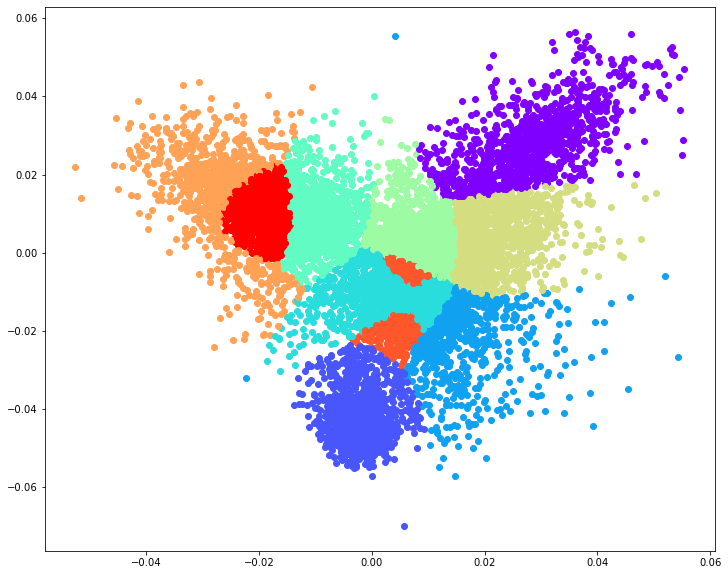

In [16]:
classes = list(set(y_test))
colors = cm.rainbow(np.linspace(0, 1, len(classes)))
pltlbl = {classes[clas] : colors[clas] for clas in range(len(classes))}

plt.figure(figsize=(12,10))
for point,pred in zip(proj1,pred1):
    plt.scatter(point[0],point[1],color=pltlbl[pred])
plt.show()

## Projecting for D' = 3

In [17]:
projection_dim = 3
#Fitting the dataset for D' = 3
W_vec,g_m, g_cov, pr = FLD_fit(data_train,labels_train, projection_dim)
W_vec,g_m, g_cov, pr

(array([[0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j]]),
 {5: array([0.00888454+0.j, 0.00245902+0.j, 0.00361522+0.j]),
  0: array([0.02676009+0.j, 0.02668783+0.j, 0.01137035+0.j]),
  4: array([-0.01100066+0.j,  0.00961728+0.j, -0.0100132 +0.j]),
  1: array([-0.0017983 +0.j, -0.04156634+0.j,  0.00191125+0.j]),
  9: array([-0.01788016+0.j,  0.01058523+0.j, -0.00319893+0.j]),
  2: array([ 0.01136934+0.j, -0.01432411+0.j, -0.00116711+0.j]),
  3: array([ 0.00504206+0.j, -0.01024315+0.j,  0.00853051+0.j]),
  6: array([ 0.02012079+0.j,  0.0034312 +0.j, -0.02151621+0.j]),
  7: array([-0.02317453+0.j,  0.01440979+0.j,  0.00440759+0.j]),
  8: array([ 0.00565978+0.j, -0.00960521+0.j,  0.00054459+0.j])},
 {5: array([[ 5.43643861e-05+0.j, -1.31230456e-05+0.j, -1.95133560e-06+0.j],
         [-1.31230456e-05+0.j,  8.61118034e-05+0.j, -9.4930

## Calculating Accuracy for D' = 3

In [18]:
#Predicting the training set value with D'=3
Acc,pred,proj = score(data_train,labels_train,W_vec,g_m, g_cov, pr)
print(f"Training set accuray:{Acc*100}%")

Training set accuray:74.55166666666668%


In [19]:
#Predicting the test set value with D'=3
Acc1,pred1,proj1 = score(data_test,labels_test,W_vec,g_m, g_cov, pr)
print(f"Test set accuray:{Acc1*100}%")

Test set accuray:74.24%


## Plotting Results for D' = 3 in 2D plot

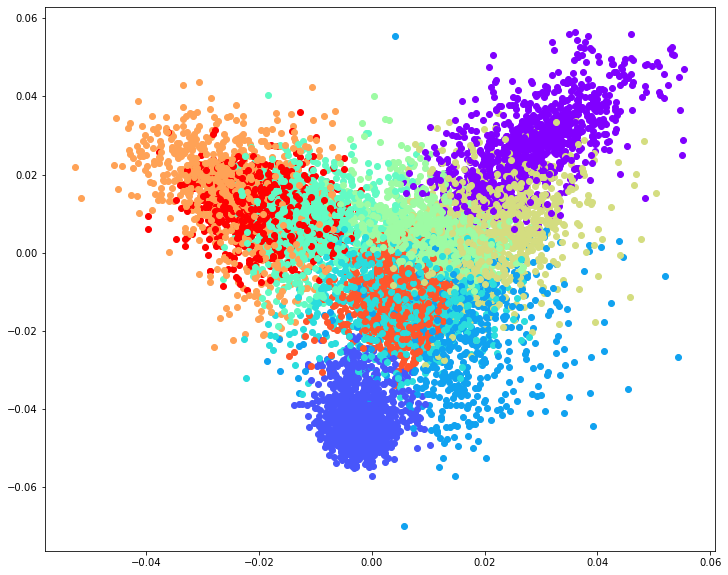

In [20]:
classes = list(set(y_test))
colors = cm.rainbow(np.linspace(0, 1, len(classes)))
pltlbl = {classes[c] : colors[c] for c in range(len(classes))}

plt.figure(figsize=(12,10))
for point,pred in zip(proj1,pred1):
    plt.scatter(point[0],point[1],color=pltlbl[pred])
plt.show()

## Plotting in 3D Space

D:\CodingSW\Conda\envs\tfl\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\CodingSW\Conda\envs\tfl\lib\site-packages\matplotlib\collections.py:546: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
D:\CodingSW\Conda\envs\tfl\lib\site-packages\matplotlib\colors.py:292: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


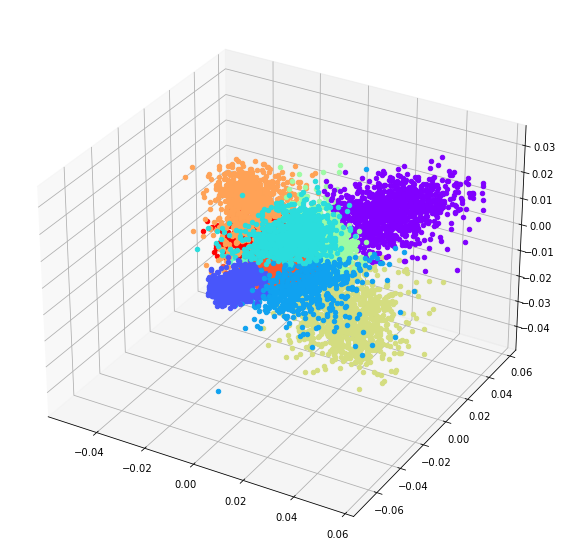

In [21]:
classes = list(set(labels_test))
colors = cm.rainbow(np.linspace(0, 1, len(classes)))
pltlbl = {classes[c] : colors[c] for c in range(len(classes))}

fig = plt.figure(figsize=(12,10))
ax =fig.add_subplot(111,projection='3d')
ax.mouse_init()

for point,pred in zip(proj1,pred1):
    ax.scatter(point[0],point[1],point[2],color=pltlbl[pred])
plt.show()

# Conclusion

- The Reduction from 784 features to 2 dimentions i.e. D' = 2 result in an accuracy of 56.5% on the test set which tells that even after considering just 2 features, we can get a significant amount of data representation for the classification.
- Adding the third dimention i.e. D' = 3 boosts the test set accuracy from 56.5% to 74.24%

# Bias Variance Decomposition 

Installing necessary Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
import matplotlib
from numpy.matlib import repmat
import time
import scipy 
from scipy.io import loadmat
%matplotlib inline 

We will now create a data set for which we can approximately compute this decomposition. The function `toydata` generates a binary data set with class 1 and 2.

toydata is a helper function which creates a binary data with n/2 values in class 1 and n/2 values in class 2. With class 1 being the label for data drawn from a normal distribution having mean 0 and sigma 1. And class 2 being the label for data drawn from a normal distribution with mean as the offset and sigma 1.

In [ ]:
def toydata(offset,n):
  """
  f[x,y]=toydata(OFFSET,N)
    
    This function constructs a binary data set. 
    Each class is distributed by a standard Gaussian distribution.
    'nh' is giving us the two parts of 'n' 
    'a' giving us the dataset
  """

  a = np.random.randn(n,2)
  nh = int(np.ceil(n/2))
  a[nh: ,:] += offset

  y = np.ones(n)
  y[nh: ] *= 2
  m = np.random.permutation(n)
  return a[m, :],y[m]

In order to focus on noise , we need to compute ybar(x) in **computeybar** 

In [ ]:
def computeybar(x,offset):
  """
   f[ybar]=computeybar(x, OFFSET);

    computes the expected label 'ybar' for a set of inputs x
    generated from two standard Normal distributions
    m , s are normal distibution parameters
    'x' is the array of 2D vectors
    'ybar' is the vector of expected outputs for x
  """
  n, t = x.shape
  yb = np.zeros(n)

  ndist = lambda a , m , s : np.exp(-0.5 * np.power((a-m)/ s, 2)) / (np.sqrt(2 * np.pi)*s)

  d1 = ndist(x,0,1)
  d11 = d1[:,0]*d1[:,1]
  d2 = ndist(x,offset,1)
  d22 = d2[:,0]*d2[:,1]

  dm = (d11+d22)/2

  dy1 = d11*0.5/dm
  dy2 = d22*0.5/dm

  yb = dy1 + 2*dy2

  return yb



Visualizing the Data with the bayes classifier. We can see in the plotting of the two classes of points 

7.5 % Error


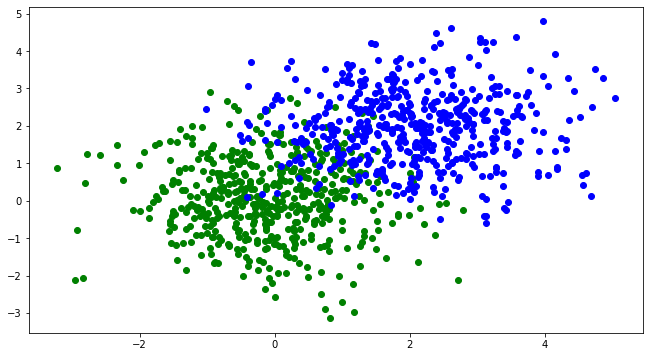

In [ ]:
offset = 2

x , y = toydata(offset,1000)

ybar = computeybar(x,offset)
pred = np.round(ybar)
error = pred != y

err = error.sum() /len(y) *100
print(err , "% Error")

a1 = y == 1
a2 = y == 2
plt.figure(figsize = (11,6))
plt.scatter(x[a1,0] , x[a1,1], c = 'g' , marker = 'o')
plt.scatter(x[a2,0] , x[a2,1], c = 'b', marker = 'o')
plt.show()

distance is a helper function used in our implementation of the ridge regression.

In [ ]:
def distance(x, z= None):

  """
  D = distance(x,z)

    It Computes the Euclidean distance matrix.
    'x' is a matrix of n*d , n being the column vectors 
    'z' is a matrix of m*d , m being the column vectors
  """

  if z is None:
    n , d = x.shape
    dd = -2*np.dot(x,x.T) + repmat(ss,1,n)
    ss = np.sum(np.power(x,2), axis=1).reshape(-1,1)
    d = dd + repmat(ss.T,n,1)
    np.fill_diagonals(d,0)

    d = np.sqrt(np.maximum(d,0))

  else:
    n , d = x.shape
    m , _ = z.shape
    st = np.sum(np.power(z,2), axis=1).reshape(1,-1)
    ss = np.sum(np.power(x,2), axis=1).reshape(-1,1)

    dd = -2*np.dot(x,z.T) + repmat(ss,1,m)
    d = dd + repmat(st,n,1)
    d = np.sqrt(np.maximum(d,0))

  return d



In order to calculate bias and hbar , we need to use a model to get outputs from the given data , here we use ridge regression (kernelized) with kernel width sigma and regularization constant lambda

In [ ]:
def ridgereg(xtr,ytr,sigma = 0.1,l = 0.01):
  """
    function ridgereg(xTr,yTr,sigma,l)
    
    l is lambda , regularization constant
    xTr is the training data 
    yTr are the training labels 
    sigma is the kernel width (>0)
    
    function gives us the predictions from the data 
  """

  k = lambda x, z: np.power(1+(np.power(distance(x,z),2)/(2*np.power(sigma,2))),-4)
  ridge = lambda k , l2 :k + l *np.eye(k.shape[0],k.shape[1])

  ans = np.linalg.solve(ridge(k(xtr,xtr),l),ytr)

  function = lambda xt : np.dot(k(xt,xtr),ans)
  return function


**Bias** , In order to calculate the bias , we need hbar , the expected output from the model , but  we can approximate it by training many models of the same and averaging their predictions.
Here we train using different sub samples of the data from the same distribution 

In [ ]:
def computehbar(x,s,l,n,models,offset):
  """
    function computehbar(x, sigma, lmbda, small'n', no. of models, OFFSET);

    computes the expected prediction for the given data by averaging . 
    we know x , s , l being the data , sigma and lambda , used for ridge regression model
    n being the sub sample of data used

    hbar being the average of prediction outputs for each test input
    Now we can calculate the Bias
  """

  nn = x.shape[0]
  hbar = np.zeros(nn)

  for i in range(models):
    xt , yt = toydata(offset,n)
    model = ridgereg(xt,yt,s,l)
    hbar += model(x)

  hbar /= models

  return hbar

**Variance** , Now finally we can compute the predicted value minus the expected value and to calculate the expectation of this outcome , we average over the variances for different model outputs

In [ ]:
def computevariance(x,s,l,hbar,n,models,offset):
  """
    function computevariance(x,sigma,lmbda,hbar,small'n',no of models,OFFSET)

    computes the variance of classifiers trained on data sets and the averages over them to get the expectation
    with ridge regression with sigma and lmbda
     
    the prediction of the average classifier is taken as values stored in hbar.

    """
    

  nn = x.shape[0]
  variance = np.zeros(nn)

  for i in range(models):

    xtr , ytr = toydata(offset,n)
    model = ridgereg(xtr,ytr,s,l)
    variance += (model(x)-hbar)**2

  variance = np.mean(variance)/models
  return variance

## Now that we have calculated ybar , hbar and variance using the above functions , we can execute the Demo and thus see that how the error decomposes (roughly) into bias, variance and noise when regularization constant λ increases.

In [ ]:
ns = 10
nb = 10000

models = 100

l = np.arange(-6,0+0.5,0.5)

s = 4

nl = len(l)
lbias = np.zeros(nl)
lvariance = np.zeros(nl)
ltotal = np.zeros(nl)
lnoise = np.zeros(nl)
lsum = np.zeros(nl)
#here we use different lambdas (regularization constants for classifiers)
for m in range(nl):
  lm = 2**l[m]

  xt , yt = toydata(offset,nb)

  total = 0

  for i in range(models):
    xt2 ,yt2 = toydata(offset,ns)
    fsm = ridgereg(xt2,yt2,s,lm)
    total += np.mean((fsm(xt)-yt)**2)

  total = total/models
  # Noise esitimation 
  ybar = computeybar(xt,offset)
  noise = np.mean((yt-ybar)**2)

  # Bias estimation 
  hbar = computehbar(xt,s,lm,ns,models,offset)
  bias = np.mean((hbar-ybar)**2)

  # Variance estimation 
  variance = computevariance(xt,s,lm,hbar,ns,models,offset)

  lbias[m] = bias
  lvariance[m] = variance
  ltotal[m] = total
  lnoise[m] = noise
  lsum[m] =  lvariance[m] + lbias[m] + lnoise[m]
  print( "Variance = ",lvariance[m], " Bias = ", lbias[m], " Noise = ",lnoise[m], " Total = ",lsum[m] , " Test Error = ", ltotal[m] )

Variance =  0.07758984458889796  Bias =  0.02516997501726676  Noise =  0.05642559159605332  Total =  0.15918541120221805  Test Error =  0.16833761404302458
Variance =  0.07070928996772964  Bias =  0.03158903758737835  Noise =  0.06116211193278158  Total =  0.16346043948788958  Test Error =  0.16339895156320886
Variance =  0.06081551003139399  Bias =  0.03218190958889351  Noise =  0.05790663278744675  Total =  0.15090405240773425  Test Error =  0.14921310872769752
Variance =  0.05287790975037319  Bias =  0.03055785596258336  Noise =  0.057577759196476896  Total =  0.14101352490943345  Test Error =  0.1382143816469759
Variance =  0.04618725951986149  Bias =  0.03279655439628842  Noise =  0.05725306557660416  Total =  0.13623687949275406  Test Error =  0.13615768778525653
Variance =  0.04288219314447837  Bias =  0.03800508588880912  Noise =  0.05709818756684306  Total =  0.13798546660013056  Test Error =  0.13429135918016522
Variance =  0.03946617858266028  Bias =  0.0455468456909031  Noi

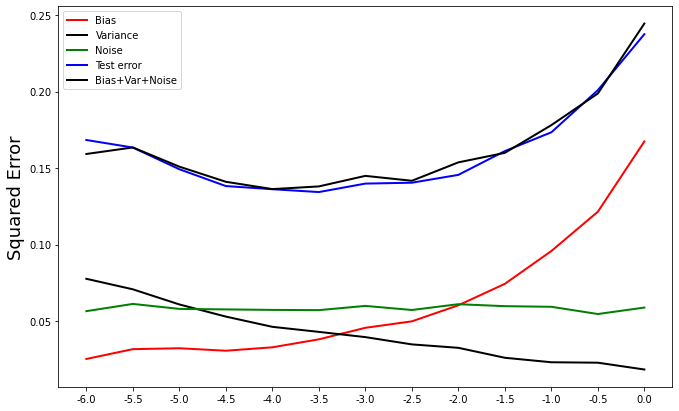

In [ ]:
plt.figure(figsize=(11,7))
plt.plot(lbias[:nl],c='r',linestyle='-',linewidth=2)
plt.plot(lnoise[:nl],c='g', linestyle='-',linewidth=2)
plt.plot(ltotal[:nl],c='b', linestyle='-',linewidth=2)
plt.plot(lvariance[:nl],c='k', linestyle='-',linewidth=2)
plt.plot(lsum[:nl],c='k', linestyle='-',linewidth=2)

plt.legend(["Bias","Variance","Noise","Test error","Bias+Var+Noise"]);
plt.ylabel("Squared Error",fontsize=18);
plt.xticks([i for i in range(nl)],l);


## We can conclude that the bigger number for the number of models and/or the training dataset, the better your approximation can be .